**Lab** 2:
Augmentation -Geometric-Affine
Morphology-Dialation-Erosion- In a script

Image Restoration using any four interpolation methods

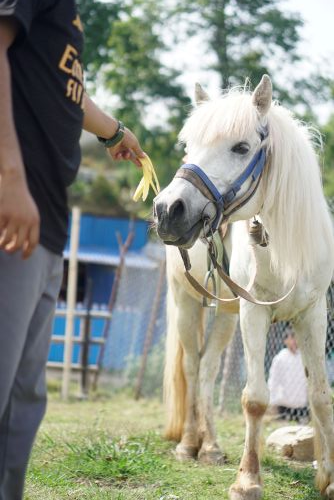

In [ ]:
import cv2
import matplotlib.pyplot as plt
import sys

img = cv2.imread('BGR.png')    # Reading an image in BGR

if img is None:
  sys.exit("COuld not read the image!")



from google.colab.patches import cv2_imshow

cv2_imshow(img)

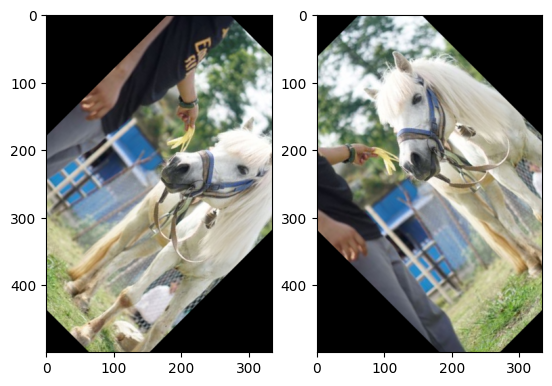

In [ ]:
from skimage.transform import rotate

from google.colab.patches import cv2_imshow

img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

clock = rotate(img, -45)
anti_clock = rotate(img, 45)

plt.subplot(1,2,1)
plt.imshow(clock)
plt.subplot(1,2,2)
plt.imshow(anti_clock)

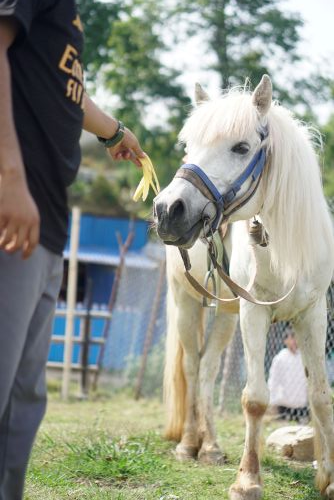

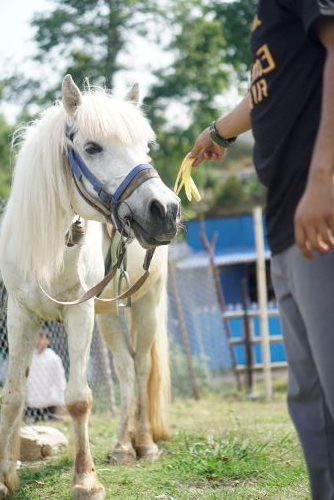

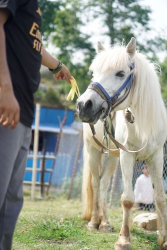

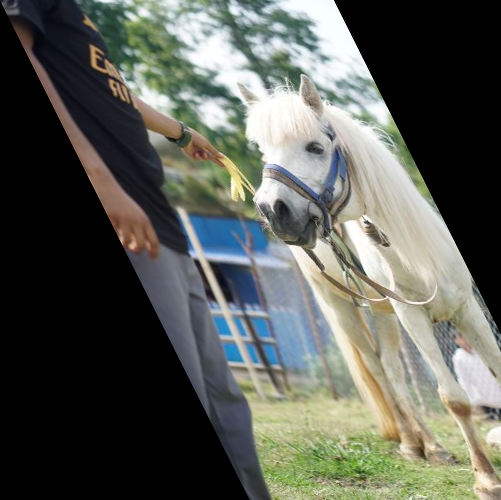

In [ ]:
####
import numpy as np

img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

reflected = cv2.flip(img, 1)  # 1: horizontal, 0: vertical, -1: both

# Scaling
scaled = cv2.resize(img, None, fx=0.5, fy=0.5)  # scale by 0.5 times

# Shearing (along x-axis)
rows, cols = img.shape[:2]
M_shear = np.float32([[1, 0.5, 0],
                      [0,   1, 0]])
sheared = cv2.warpAffine(img, M_shear, (int(cols * 1.5), rows))

# Show results
cv2_imshow(img)
cv2_imshow(reflected)
cv2_imshow(scaled)
cv2_imshow(sheared)

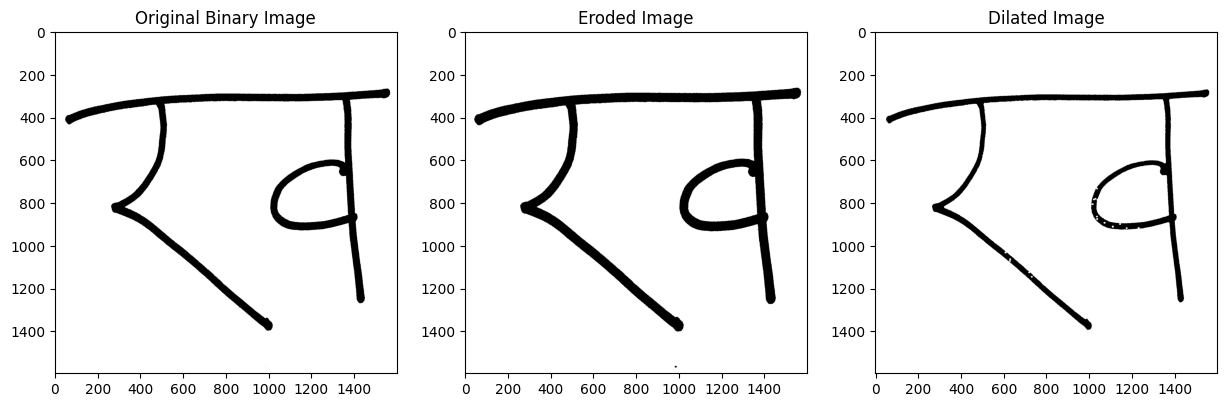

In [ ]:
### Morphoogical Operation: Dialation and Erosion

import cv2

horse_image = cv2.imread('script.jpeg', cv2.IMREAD_GRAYSCALE)

# Otsu's thresholding to convert the image to binary
_, horse_binary = cv2.threshold(horse_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Create a structuring element (kernel)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))

eroded = cv2.erode(horse_binary, kernel, iterations=1)                      # erosion

dilated = cv2.dilate(horse_binary, kernel, iterations=1)                     # dilation

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Original Binary Image')
plt.imshow(horse_binary, cmap='gray')
plt.subplot(1, 3, 2)
plt.title('Eroded Image')
plt.imshow(eroded, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('Dilated Image')
plt.imshow(dilated, cmap='gray')
plt.show()

(500, 334)


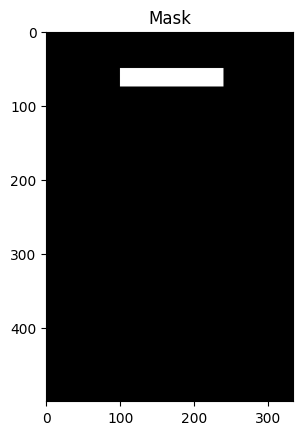

In [ ]:
### image restoration

mask = np.zeros(img.shape[:-1], dtype=np.uint8)
mask[50:75, 100:240] = 1                                    # region to mask
print(mask.shape)

plt.title('Mask')
plt.imshow(mask, cmap='gray')

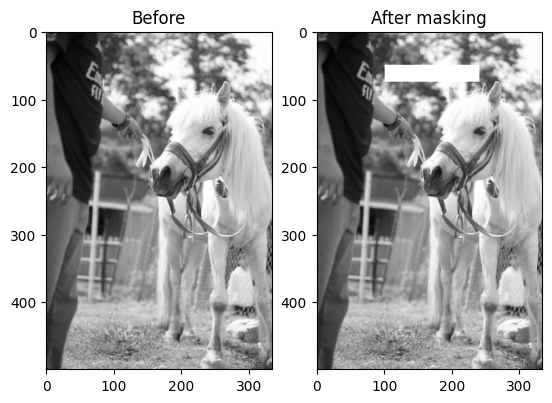

In [ ]:
############

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

damaged_image = gray.copy()
plt.subplot(1,2,1)
plt.title('Before')
plt.imshow(damaged_image, cmap ='gray')

damaged_image[mask == 1] = 255
plt.subplot(1,2,2)
plt.title('After masking')
plt.imshow(damaged_image, cmap = 'gray')

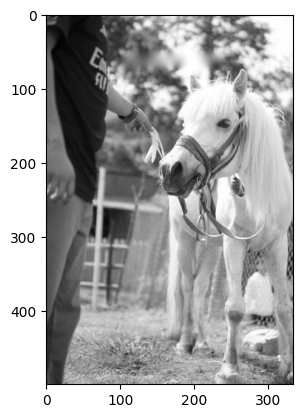

In [ ]:
# Interpolating and restoring Image
from skimage.restoration import inpaint


# Method 1
restored_biharmonic = inpaint.inpaint_biharmonic(damaged_image, mask)

plt.imshow(restored_biharmonic, cmap = 'gray')

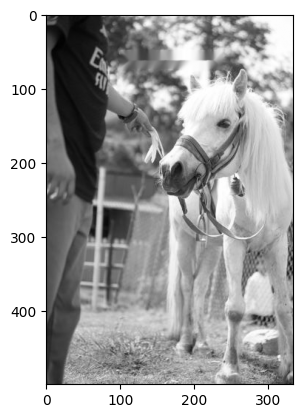

In [ ]:
### Method 2
#Napiers Stokes

restored_ns = cv2.inpaint(gray, mask, inpaintRadius=3, flags=cv2.INPAINT_NS)
plt.imshow(restored_ns, cmap='gray')


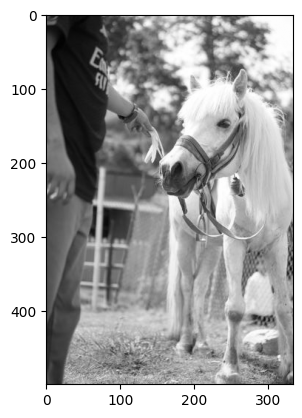

In [ ]:
## Simple Interpolation

import numpy as np
from scipy.interpolate import griddata

def simple_interpolation_restore(img, mask):
    h, w = mask.shape
    known_yx = np.argwhere(mask == 0)
    known_vals = img[mask == 0]
    missing_yx = np.argwhere(mask == 255)

    restored_vals = griddata(known_yx, known_vals, missing_yx, method='linear', fill_value=0)
    restored = img.copy()
    restored[mask == 255] = restored_vals
    return restored

#gray = cv2.cvtColor(gray, cv2.COLOR_BGR2GRAY)
restored = simple_interpolation_restore(gray, mask)
plt.imshow(restored, cmap='gray')


In [ ]:
pip install opencv-contrib-python


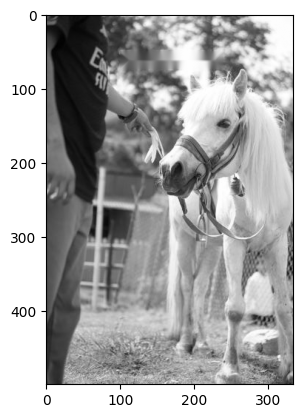

In [ ]:
# Last Method


dst = cv2.inpaint(gray, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

plt.imshow(dst, cmap='gray')